# 911 Calls Capstone Project

In [1]:
import numpy as np
import pandas as pd
import scipy

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
list(df['zip'].sort_values(ascending = False).head(5).keys())

[67109, 25715, 91947, 49809, 16244]

In [7]:
list(df['twp'].value_counts().head(5).keys())

['LOWER MERION', 'ABINGTON', 'NORRISTOWN', 'UPPER MERION', 'CHELTENHAM']

In [8]:
df['title'].nunique()

110

## Creating new features

In [9]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [10]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

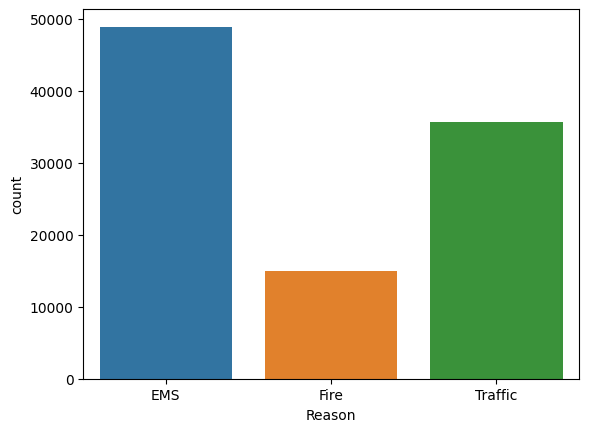

In [11]:
sns.countplot(data = df, x = 'Reason')

# Time Series

In [12]:
df['timeStamp'].dtype


dtype('O')

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
time = df['timeStamp'].iloc[0]
time.hour
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [15]:
time = df['timeStamp'].iloc[0]
time.year
df['Year'] = df['timeStamp'].apply(lambda time: time.year)

In [16]:
time = df['timeStamp'].iloc[0]
time.dayofweek
df['Dayofweek'] = df['timeStamp'].apply(lambda time: time.dayofweek)
#month
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
df['Dayofweek'] = df['Dayofweek'].map(dmap)

<Axes: xlabel='Dayofweek', ylabel='count'>

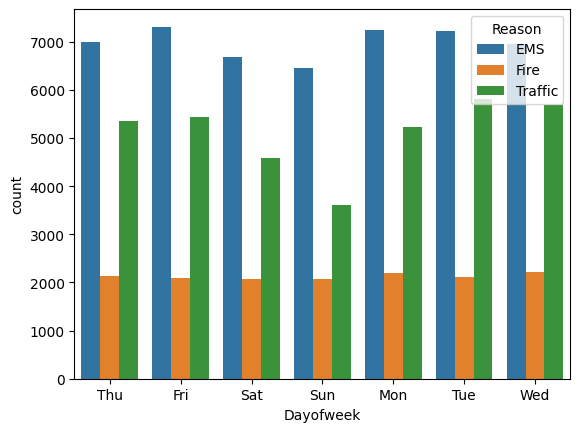

In [19]:
sns.countplot(data = df, x = 'Dayofweek', hue = 'Reason')

<Axes: xlabel='Month', ylabel='count'>

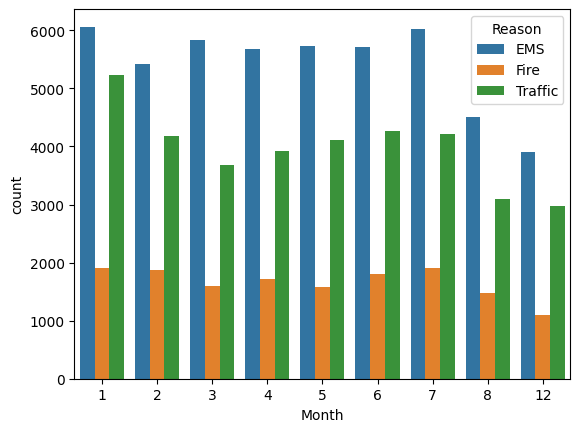

In [20]:
sns.countplot(data = df, x = 'Month', hue = 'Reason')

For the missing Months 9-11

In [21]:
byMonth = df.groupby('Month').count()

<Axes: xlabel='Month'>

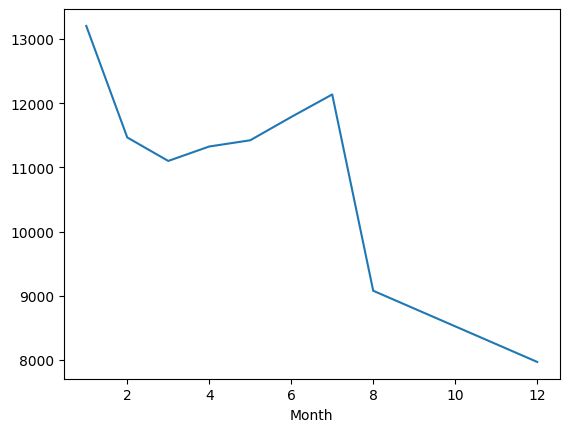

In [22]:
byMonth['lat'].plot() #used latitude for accuracy

lmplot

<Axes: xlabel='Month', ylabel='twp'>

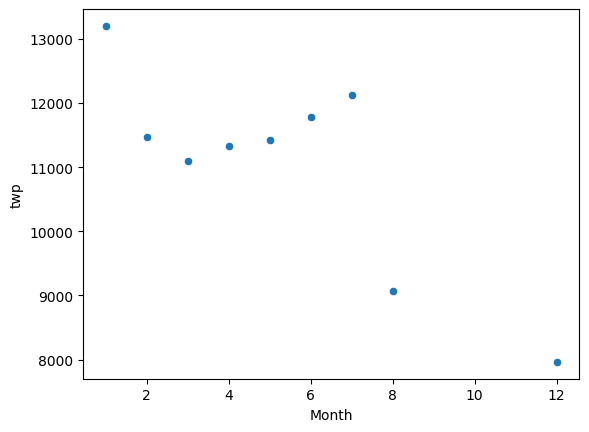

In [23]:
sns.scatterplot(x='Month', y = 'twp', data = byMonth.reset_index())

**Creating a date column to analysis calls per day** 

In [24]:
time = df['timeStamp'].iloc[0]
df['Date'] = df['timeStamp'].apply(lambda time: time.date())


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

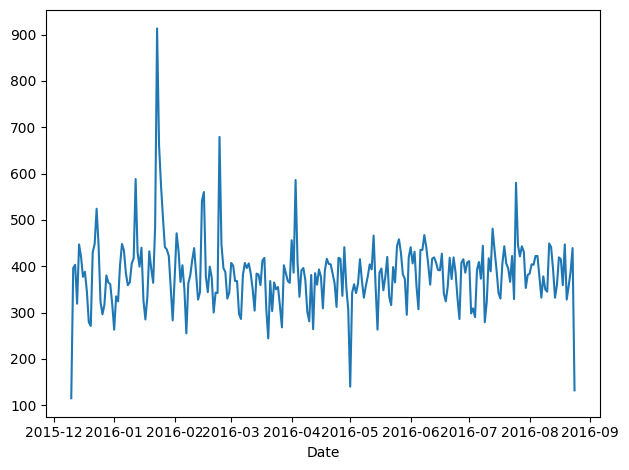

In [25]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

Each plot representing a Reason for the 911 call


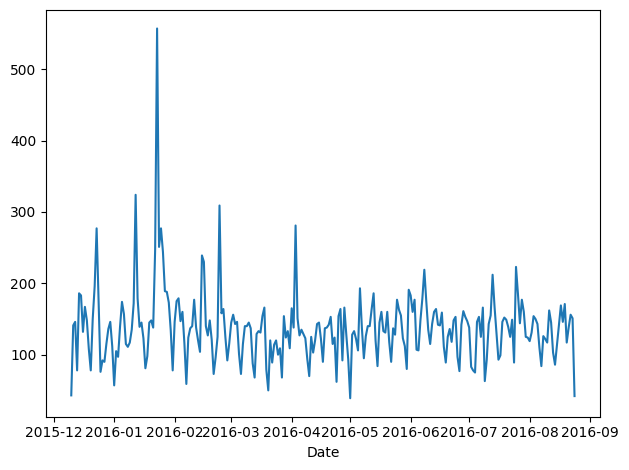

In [26]:
df[df['Reason']== 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

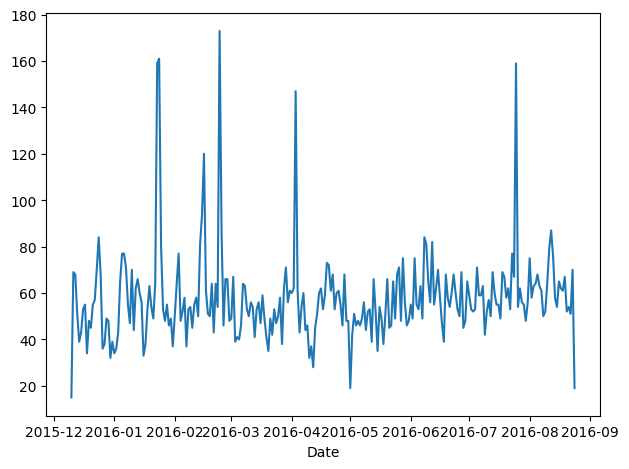

In [27]:
df[df['Reason']== 'Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

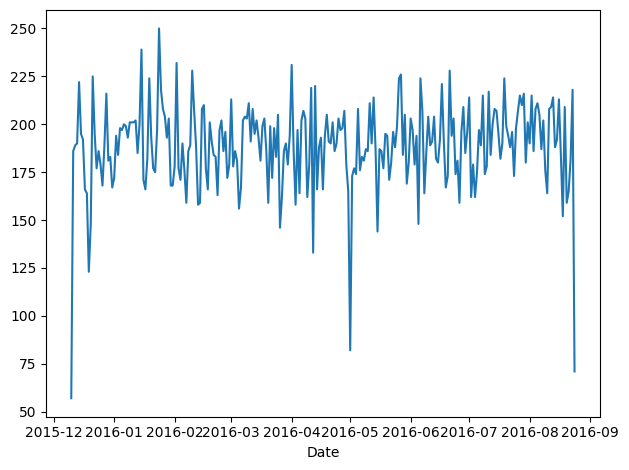

In [28]:
df[df['Reason']== 'EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [29]:
dayHour = df.groupby(by=['Dayofweek', 'Hour']).count()['Reason'].unstack()

Using Hour and Dayofweek to determine most popular time of the hour of the day/month for 911 calls to occur



<Axes: xlabel='Month', ylabel='Dayofweek'>

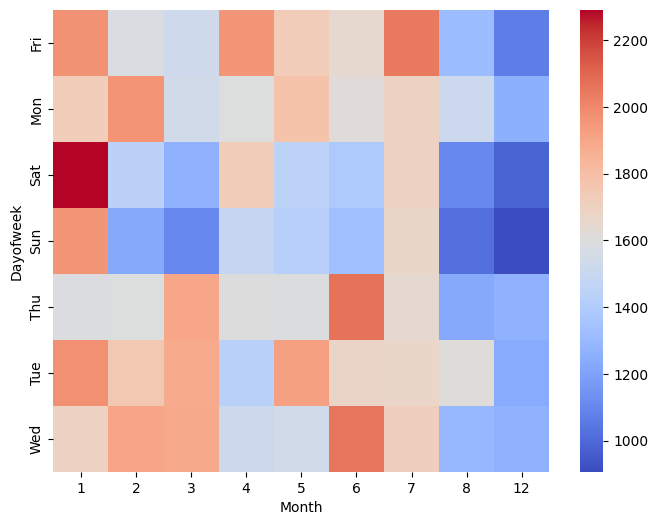

In [45]:
plt.figure(figsize =(8,6))
sns.heatmap(dayHour, cmap='coolwarm')

Clustermap using this DataFrame

<Figure size 800x600 with 0 Axes>

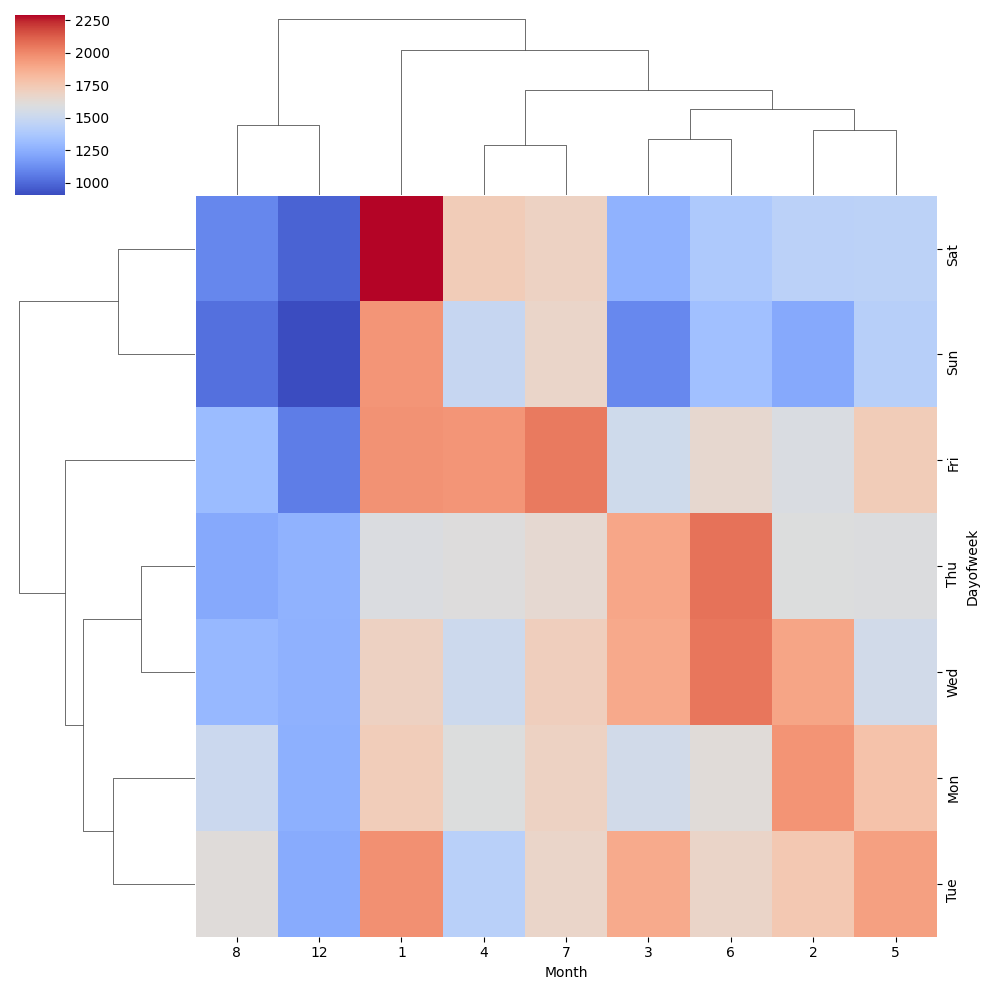

In [44]:
plt.figure(figsize =(8,6))
sns.clustermap(dayHour, cmap='coolwarm')

In [38]:
#not many calls occured during the midnight but throughout the day and evening, not many crimes took place on the weekend

Using Month and Dayofweek to determine most popular time of the week/month for 911 calls to occur

In [33]:
dayMonth = df.groupby(by=['Dayofweek', 'Month']).count()['Reason'].unstack()

<Figure size 800x600 with 0 Axes>

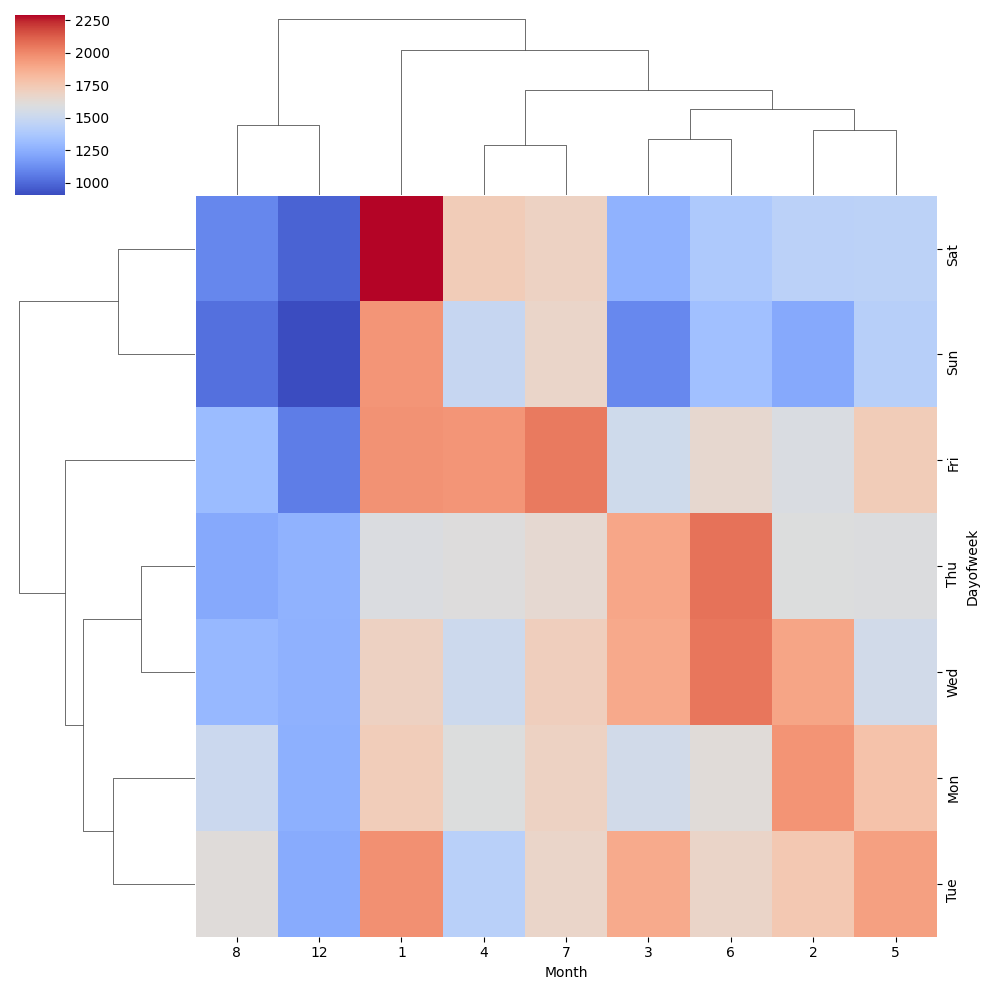

In [46]:
plt.figure(figsize =(8,6))
sns.clustermap(dayMonth, cmap='coolwarm')